In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def read_file(path):
#     df = pd.read_csv(path,delimiter = '\t',skiprows = [0,1,2,3])
    df = pd.read_csv(path,delimiter = ',')
    return df

In [5]:
expression_train = read_file("expression_data_train.csv")

In [6]:
expression_test = read_file("expression_test.csv")

In [7]:
X = expression_train.iloc[:,0:24368].values
y = expression_train[['Y_label']].values

In [8]:
X_test = expression_test.iloc[:,0:24368].values
y_test = expression_test[['Y_label']].values

In [9]:
y = np.squeeze(y)
y_test = np.squeeze(y_test)

In [10]:
from ReliefF import ReliefF
fs = ReliefF(n_neighbors=10, n_features_to_keep=1500)
X = fs.fit_transform(X, y)
# X_train = fs.fit_transform(X_train)
# X_test_subset = fs.transform(X_test)
print(X.shape, y.shape)

(1122, 1500) (1122,)


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc 
import matplotlib.pyplot as plt

In [12]:
rfc1=RandomForestClassifier(class_weight= {0:1 , 1:2} , random_state=0, max_features='auto', n_estimators= 200, max_depth=3, criterion='entropy')

In [13]:
rfc1.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 2},
            criterion='entropy', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [14]:
Xtest_subset  = fs.transform(X_test)


In [17]:
pred=rfc1.predict(Xtest_subset)

In [18]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.6428571428571429


In [19]:
print("F1 for Random Forest on CV data: ",f1_score(y_test,pred))

F1 for Random Forest on CV data:  0.6062992125984252


In [20]:
print("F1 for Random Forest on CV data: ",precision_score(y_test,pred))

F1 for Random Forest on CV data:  0.4782608695652174


In [21]:
print("F1 for Random Forest on CV data: ",recall_score(y_test,pred))

F1 for Random Forest on CV data:  0.8279569892473119


In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc 
from sklearn import preprocessing

<Figure size 432x288 with 0 Axes>

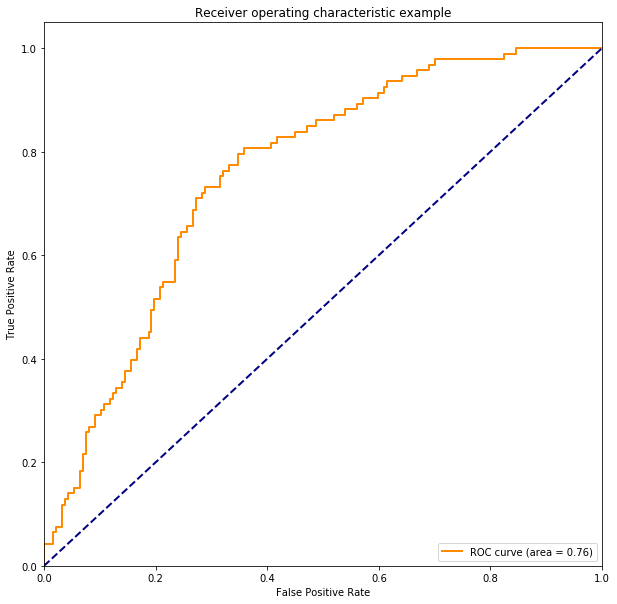

In [24]:

# y_score = rfc1.decision_function(X_test)
# y_score = clf.decision_function(X_test)

# Plot ROC AUC Curve
# Compute ROC curve and ROC area for each class
pred = rfc1.predict_proba(Xtest_subset)
pred = pred[:,1]

fpr,tpr,threshold = roc_curve(y_test, pred) 
roc_auc = auc(fpr,tpr) 

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()